<a href="https://colab.research.google.com/github/JPP-J/deep-_learning_project/blob/main/DL_2_Oblect_dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# check gpu
!nvidia-smi

Mon Jan  6 08:01:08 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#  YOLO model install

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 877.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
!yolo

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

    Arguments received: ['yolo']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of frozenset({'detect', 'classify', 'obb', 'pose', 'segment'})
                MODE (required) is one of frozenset({'benchmark', 'train', 'track', 'predict', 'val', 'export'})
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolo11n.pt epochs=10

# YOLO models


* YOLO11
* YOLOv10
* YOLOv9
* YOLOv8
* YOLOv7
* YOLOv6-3.O
* YOLOv5
* pp-YOLOE+
* DAMO-YOLO
* YOLOX
* RTDETRv2

![model](https://raw.githubusercontent.com/ultralytics/assets/refs/heads/main/yolo/performance-comparison.png)

# Usage yolov8n model

In [ ]:
import torch
from ultralytics import YOLO
from PIL import Image
import requests
from PIL import ImageDraw
import os
from io import BytesIO
from datetime import datetime


def detect_object(url, conf=0.8, model='yolov8n.pt'):
  # Load YOLOv8 model (you can specify your model file yolov8n.pt)
  model = YOLO(model)  # Load the model

  # Base directory for saving images
  output_dir = '/content/result'
  os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

  # Usage
  response = requests.get(url, stream=True)
  response.raise_for_status()  # Raise an exception for HTTP errors

  image = Image.open(BytesIO(response.content))
  results = model.predict(image, conf=conf)

  # Save the original image and result image
  timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
  original_filename = os.path.join(output_dir, f'image_{timestamp}_ori.jpg')
  result_filename = os.path.join(output_dir, f'image_{timestamp}_result.jpg')

  # Save the images
  image.save(original_filename)
  results[0].save(result_filename)

  return results

In [ ]:
url1 = 'https://c8.alamy.com/comp/CFBY2F/thailand-bangkok-traffic-jam-CFBY2F.jpg'
results1 = detect_object(url1, conf=0.7, model='yolov8n.pt')


0: 480x640 3 cars, 12.1ms
Speed: 3.6ms preprocess, 12.1ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
!ls /content/result

image_20250106_090328_ori.jpg	  image_20250106_090453_result.jpg
image_20250106_090328_result.jpg  image_20250106_090600_ori.jpg
image_20250106_090453_ori.jpg	  image_20250106_090600_result.jpg


In [ ]:
# !rm -rf /content/result/*

## Example1:

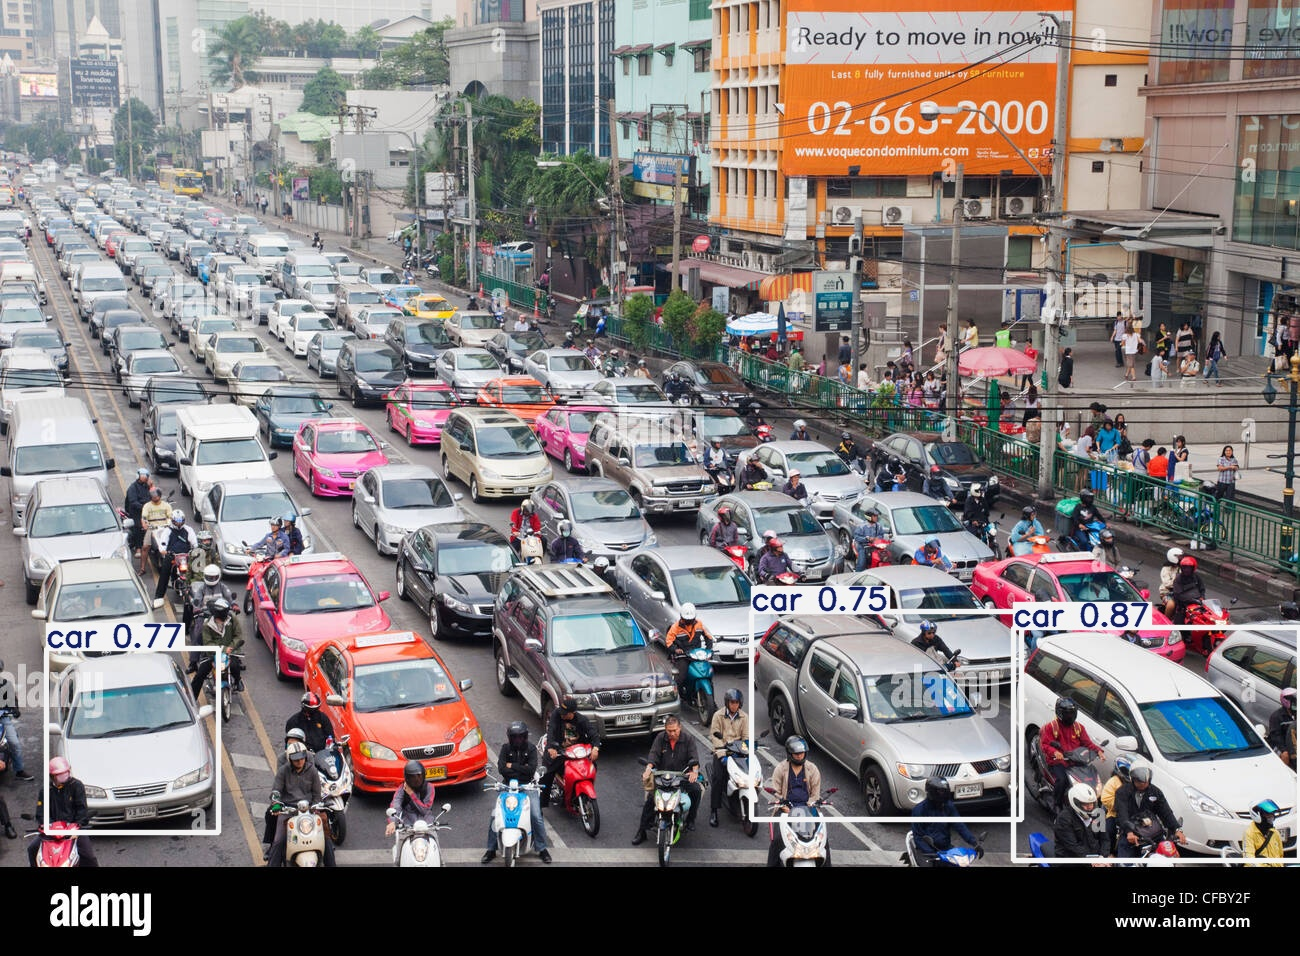

In [ ]:
from PIL import Image
image = Image.open('/content/result/image_20250106_090328_result.jpg')
image

In [ ]:
results1[0].boxes.cls

tensor([2., 2., 2.], device='cuda:0')

## Example2:

In [ ]:
url1 = 'https://c8.alamy.com/comp/CFBY2F/thailand-bangkok-traffic-jam-CFBY2F.jpg'
results2 = detect_object(url1, conf=0.5, model='yolov8n.pt')


0: 480x640 1 person, 12 cars, 1 motorcycle, 1 umbrella, 14.7ms
Speed: 3.7ms preprocess, 14.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


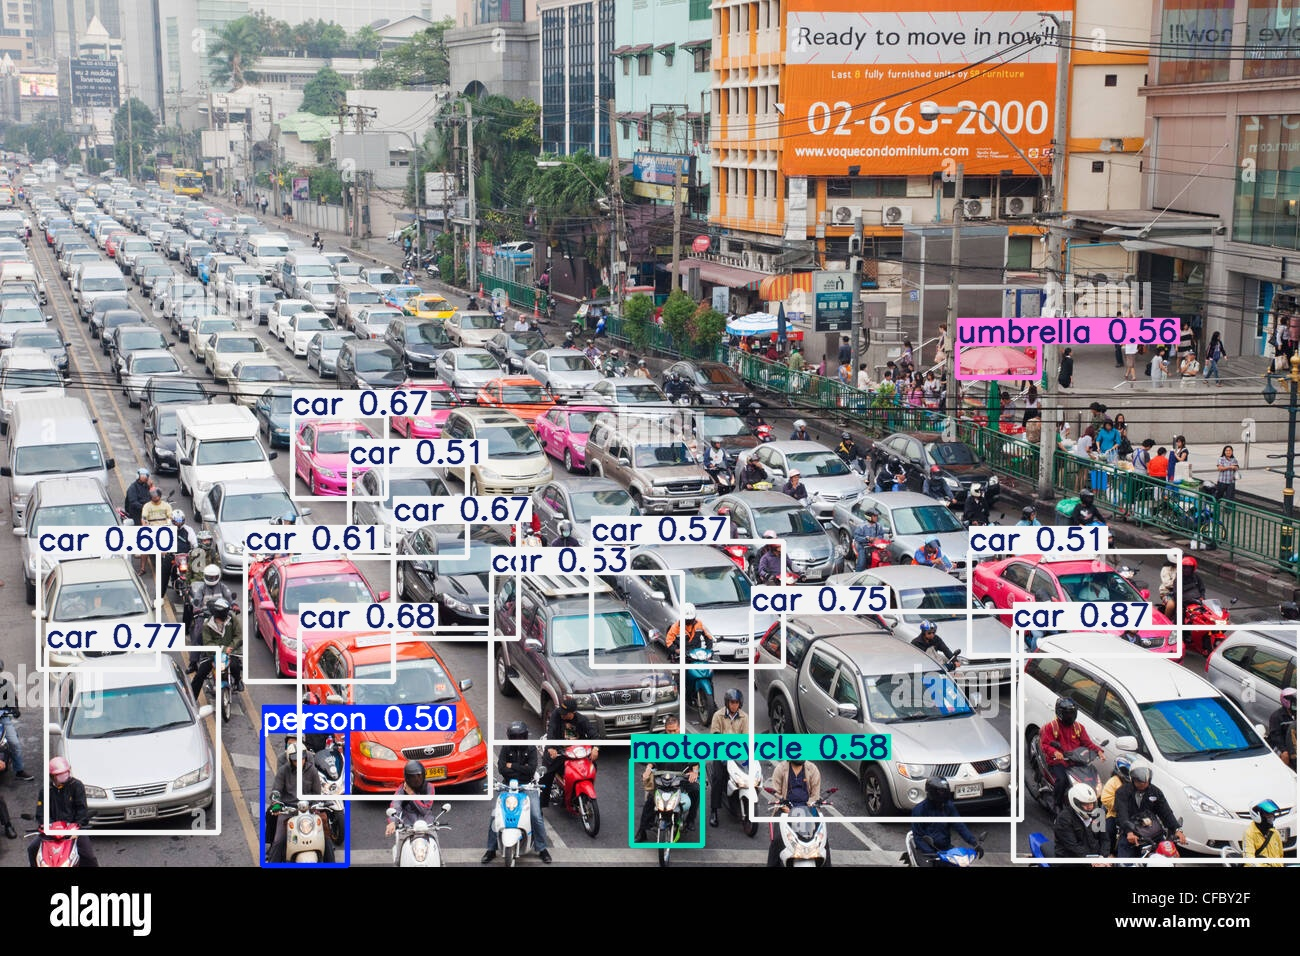

In [ ]:
from PIL import Image
image = Image.open('/content/result/image_20250106_090453_result.jpg')
image

## Example3:

In [ ]:
url2 = 'https://t4.ftcdn.net/jpg/04/15/79/09/360_F_415790935_7va5lMHOmyhvAcdskXbSx7lDJUp0cfja.jpg'
results3 = detect_object(url2, conf=0.3, model='yolov8n.pt')


0: 352x640 2 birds, 1 sheep, 1 cow, 1 elephant, 1 zebra, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)


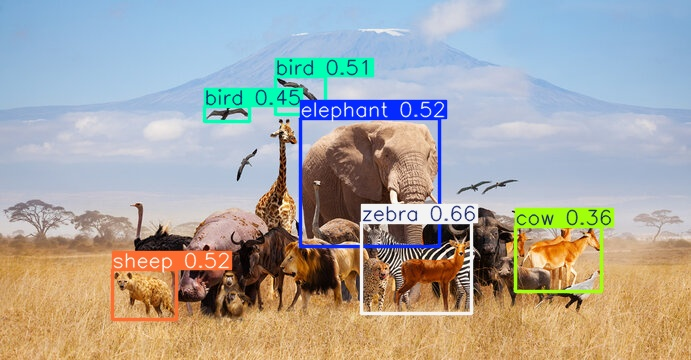

In [ ]:
from PIL import Image
image = Image.open('/content/result/image_20250106_090600_result.jpg')
image

## Detail of model yolov8n

In [ ]:
model.model

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    

## Class in yolov8n


In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model (e.g., YOLOv8-nano)
model = YOLO("yolov8n.pt")

# Get the class names
class_names = model.names

# Print all class labels
for idx, class_name in class_names.items():
    print(f"Class {idx}: {class_name}")


Class 0: person
Class 1: bicycle
Class 2: car
Class 3: motorcycle
Class 4: airplane
Class 5: bus
Class 6: train
Class 7: truck
Class 8: boat
Class 9: traffic light
Class 10: fire hydrant
Class 11: stop sign
Class 12: parking meter
Class 13: bench
Class 14: bird
Class 15: cat
Class 16: dog
Class 17: horse
Class 18: sheep
Class 19: cow
Class 20: elephant
Class 21: bear
Class 22: zebra
Class 23: giraffe
Class 24: backpack
Class 25: umbrella
Class 26: handbag
Class 27: tie
Class 28: suitcase
Class 29: frisbee
Class 30: skis
Class 31: snowboard
Class 32: sports ball
Class 33: kite
Class 34: baseball bat
Class 35: baseball glove
Class 36: skateboard
Class 37: surfboard
Class 38: tennis racket
Class 39: bottle
Class 40: wine glass
Class 41: cup
Class 42: fork
Class 43: knife
Class 44: spoon
Class 45: bowl
Class 46: banana
Class 47: apple
Class 48: sandwich
Class 49: orange
Class 50: broccoli
Class 51: carrot
Class 52: hot dog
Class 53: pizza
Class 54: donut
Class 55: cake
Class 56: chair
Clas